## 1. Import Required Libraries

In [32]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add rosbag_loader to path
sys.path.insert(0, str(Path.cwd().parent))

from rosbag_loader import inspect_bag_topics, load_bag_topics, BagData

sns.set_style('darkgrid')
%matplotlib inline

## 2. Set Bag Path and Inspect Topics

In [33]:
# Use the first available bag
bag_path = '/workspace/rosbags/2025-12-17-16-02-22.bag'

# Inspect bag topics
topics_info = inspect_bag_topics(bag_path)


Bag inspection: /workspace/rosbags/2025-12-17-16-02-22.bag
Duration: 48.59 seconds

Topic                                              Type                                        Count
----------------------------------------------------------------------------------------------------
/angrybird2/active_reference/markers               visualization_msgs/Marker                    9237
/angrybird2/active_reference/path                  nav_msgs/Path                                9243
/angrybird2/agiros_pilot/mpc_command               agiros_msgs/Command                         14609
/angrybird2/agiros_pilot/odometry                  nav_msgs/Odometry                           14688
/angrybird2/agiros_pilot/state                     agiros_msgs/QuadState                       14674
/angrybird2/agiros_pilot/telemetry                 agiros_msgs/Telemetry                       14641
/angrybird2/control_mode                           agiros_msgs/UInt8Stamped                    48462
/angry

## 3. Load Rosbag Topics into Data Structures

In [34]:
# Load all topics
bag_data = load_bag_topics(bag_path, verbose=True)

# Display summary
print("\nData Summary:")
for key, value in bag_data.summary().items():
    print(f"  {key}: {value}")


Loading rosbag: 2025-12-17-16-02-22.bag
Duration: 48.59s
  Loading /mocap/angrybird2/pose...
  Loading /mocap/angrybird2/accel...
  Loading /angrybird2/agiros_pilot/state...
  Loading /angrybird2/agiros_pilot/odometry...
  Loading /angrybird2/imu...
  Loading /ti_mmwave/radar_scan_pcl_0...
  Loading /mmWaveDataHdl/RScanVelocity...
  Done!


Data Summary:
  bag_path: /workspace/rosbags/2025-12-17-16-02-22.bag
  duration_s: 48.5872323513031
  mocap_pose_samples: 4908
  mocap_accel_samples: 4896
  agiros_state_samples: 14674
  agiros_odometry_samples: 14688
  imu_samples: 48437
  radar_pcl_samples: 1457
  radar_velocity_samples: 1396


## 4. Examine Loaded Data

In [35]:
# MoCap Pose Data
if bag_data.mocap_pose:
    print("\nMoCap Pose (first 3 samples):")
    for pose in bag_data.mocap_pose[:3]:
        print(f"  t={pose.timestamp:.3f}: pos={pose.position}")
else:
    print("No MoCap Pose data found")


MoCap Pose (first 3 samples):
  t=1765983743.289: pos=[ 0.62956767 -0.19155999  1.54249807]
  t=1765983743.289: pos=[ 0.62994805 -0.19254054  1.54291147]
  t=1765983743.289: pos=[ 0.63039278 -0.19359231  1.54336226]


In [36]:
# Agiros State Data
if bag_data.agiros_state:
    print("\nAgiros State (first 3 samples):")
    for state in bag_data.agiros_state[:3]:
        print(f"  t={state.timestamp:.3f}: pos={state.position}, vel={state.velocity}")
else:
    print("No Agiros State data found")


Agiros State (first 3 samples):
  t=1765983743.289: pos=[ 0.64146019 -0.2095188   1.5446742 ], vel=[ 0.05662871 -0.03507353 -0.00872877]
  t=1765983743.289: pos=[ 0.64164834 -0.20963357  1.54464428], vel=[ 0.05663407 -0.03401894 -0.0092804 ]
  t=1765983743.289: pos=[ 0.64183805 -0.20974574  1.54461226], vel=[ 0.05663947 -0.03295573 -0.00983654]


In [37]:
# IMU Data
if bag_data.imu_data:
    print("\nIMU Data (first 3 samples):")
    for imu in bag_data.imu_data[:3]:
        print(f"  t={imu.timestamp:.3f}: accel={imu.linear_acceleration}, gyro={imu.angular_velocity}")
else:
    print("No IMU data found")


IMU Data (first 3 samples):
  t=1765983743.290: accel=[-0.981    0.18639 10.0062 ], gyro=[-0.052  0.063 -0.031]
  t=1765983743.290: accel=[-0.99081  0.17658 10.0062 ], gyro=[-0.052  0.065 -0.025]
  t=1765983743.290: accel=[-1.00062  0.16677 10.0062 ], gyro=[-0.051  0.067 -0.018]


In [38]:
# Radar Data
if bag_data.radar_pcl:
    print("\nRadar Point Cloud (first 3 samples):")
    for pcl in bag_data.radar_pcl[:3]:
        print(f"  t={pcl.timestamp:.3f}: {pcl.num_points()} points")
else:
    print("No Radar Point Cloud data found")


Radar Point Cloud (first 3 samples):
  t=1765983743.336: 1 points
  t=1765983743.369: 1 points
  t=1765983743.402: 1 points


## 5. Convert to DataFrames for Analysis

In [39]:
# Convert MoCap Pose to DataFrame
if bag_data.mocap_pose:
    mocap_pose_df = pd.DataFrame([pose.to_dict() for pose in bag_data.mocap_pose])
    print("MoCap Pose DataFrame:")
    print(mocap_pose_df.head())
    print(f"Shape: {mocap_pose_df.shape}")

MoCap Pose DataFrame:
      timestamp         x         y         z        qx        qy        qz  \
0  1.765984e+09  0.629568 -0.191560  1.542498  0.035622  0.006302 -0.572041   
1  1.765984e+09  0.629948 -0.192541  1.542911  0.036041  0.005120 -0.575014   
2  1.765984e+09  0.630393 -0.193592  1.543362  0.037053  0.004478 -0.578522   
3  1.765984e+09  0.630902 -0.194711  1.543713  0.038323  0.003849 -0.582231   
4  1.765984e+09  0.631459 -0.195907  1.543928  0.039424  0.002719 -0.586114   

         qw  
0  0.819427  
1  0.817333  
2  0.814813  
3  0.812111  
4  0.809264  
Shape: (4908, 8)


In [40]:
# Convert Agiros State to DataFrame
if bag_data.agiros_state:
    agiros_state_df = pd.DataFrame([state.to_dict() for state in bag_data.agiros_state])
    print("Agiros State DataFrame:")
    print(agiros_state_df.head())
    print(f"Shape: {agiros_state_df.shape}")

Agiros State DataFrame:
      timestamp         x         y         z        vx        vy        vz  \
0  1.765984e+09  0.641460 -0.209519  1.544674  0.056629 -0.035074 -0.008729   
1  1.765984e+09  0.641648 -0.209634  1.544644  0.056634 -0.034019 -0.009280   
2  1.765984e+09  0.641838 -0.209746  1.544612  0.056639 -0.032956 -0.009837   
3  1.765984e+09  0.641784 -0.209801  1.544551  0.047665 -0.030019 -0.011431   
4  1.765984e+09  0.641945 -0.209900  1.544512  0.047436 -0.028894 -0.012020   

         qx        qy        qz        qw        wx        wy        wz  
0 -0.042353 -0.020887  0.608679 -0.792010  0.010423 -0.013943 -0.008282  
1 -0.042352 -0.020859  0.608691 -0.792001  0.010422 -0.013943 -0.008282  
2 -0.042352 -0.020830  0.608704 -0.791993  0.010422 -0.013943 -0.008282  
3 -0.042213 -0.020560  0.608896 -0.791860  0.016195 -0.048138 -0.033953  
4 -0.042184 -0.020481  0.608945 -0.791825  0.016190 -0.048140 -0.033953  
Shape: (14674, 14)


In [41]:
# Convert IMU to DataFrame
if bag_data.imu_data:
    imu_df = pd.DataFrame([imu.to_dict() for imu in bag_data.imu_data])
    print("IMU DataFrame:")
    print(imu_df.head())
    print(f"Shape: {imu_df.shape}")

IMU DataFrame:
      timestamp       ax       ay       az     wx     wy     wz  qx  qy  qz  \
0  1.765984e+09 -0.98100  0.18639  10.0062 -0.052  0.063 -0.031 NaN NaN NaN   
1  1.765984e+09 -0.99081  0.17658  10.0062 -0.052  0.065 -0.025 NaN NaN NaN   
2  1.765984e+09 -1.00062  0.16677  10.0062 -0.051  0.067 -0.018 NaN NaN NaN   
3  1.765984e+09 -1.00062  0.16677  10.0062 -0.053  0.069 -0.014 NaN NaN NaN   
4  1.765984e+09 -1.01043  0.15696  10.0062 -0.057  0.069 -0.010 NaN NaN NaN   

   qw  
0 NaN  
1 NaN  
2 NaN  
3 NaN  
4 NaN  
Shape: (48437, 11)


## 6. Visualization: Trajectory Comparison

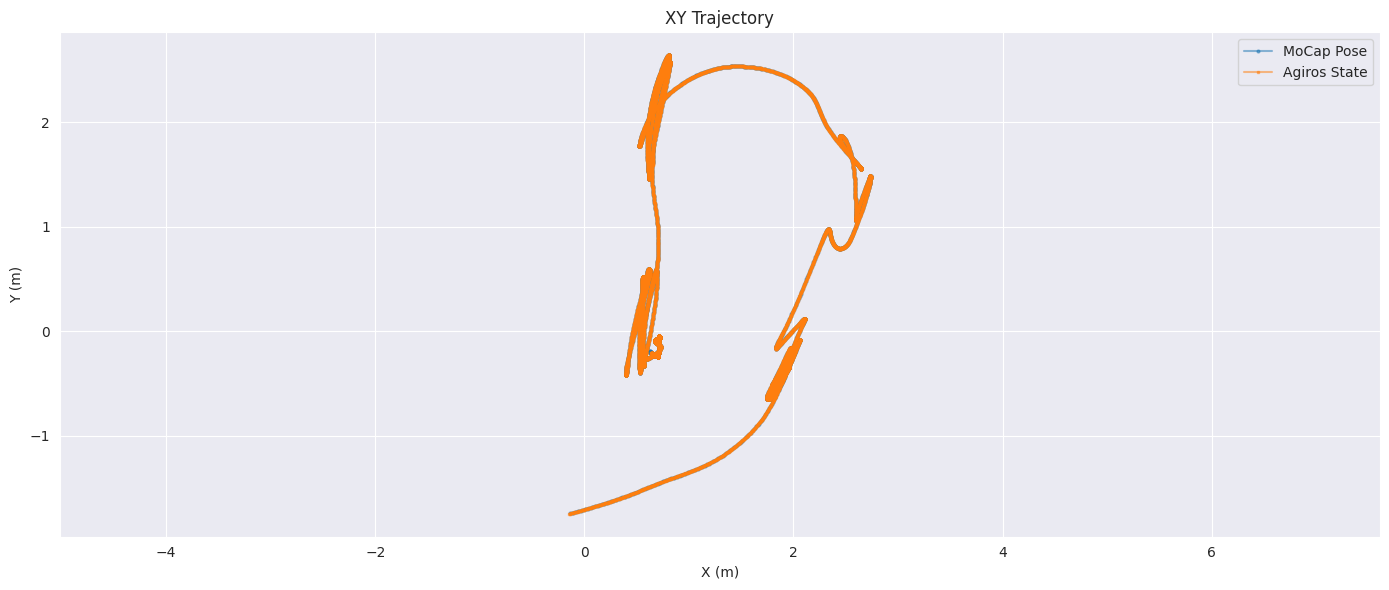

In [42]:
# Plot trajectories from different sensors
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

# XY trajectory
if bag_data.mocap_pose and mocap_pose_df is not None:
    ax.plot(mocap_pose_df['x'], mocap_pose_df['y'], 'o-', alpha=0.5, label='MoCap Pose', markersize=2)

if bag_data.agiros_state and agiros_state_df is not None:
    ax.plot(agiros_state_df['x'], agiros_state_df['y'], 's-', alpha=0.5, label='Agiros State', markersize=2)

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_title('XY Trajectory')
ax.legend()
ax.grid(True)
ax.axis('equal')

plt.tight_layout()
plt.show()


## 7. Visualization: IMU Acceleration

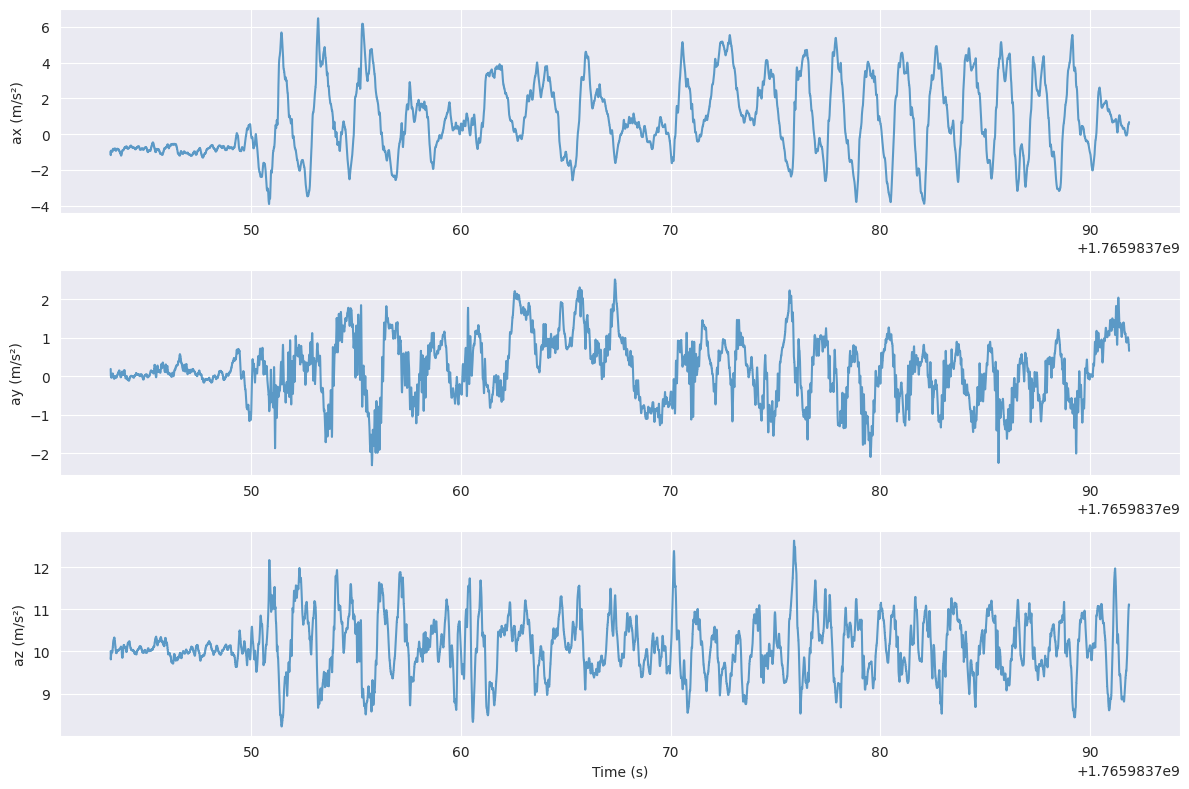

In [43]:
# Plot IMU acceleration
if bag_data.imu_data and imu_df is not None:
    fig, axes = plt.subplots(3, 1, figsize=(12, 8))
    
    axes[0].plot(imu_df['timestamp'], imu_df['ax'], alpha=0.7)
    axes[0].set_ylabel('ax (m/s²)')
    axes[0].grid(True)
    
    axes[1].plot(imu_df['timestamp'], imu_df['ay'], alpha=0.7)
    axes[1].set_ylabel('ay (m/s²)')
    axes[1].grid(True)
    
    axes[2].plot(imu_df['timestamp'], imu_df['az'], alpha=0.7)
    axes[2].set_ylabel('az (m/s²)')
    axes[2].set_xlabel('Time (s)')
    axes[2].grid(True)
    
    plt.tight_layout()
    plt.show()
else:
    print("No IMU data to plot")

## 8. Synchronization Analysis

Find time bounds where all available sensors have data for synchronized processing.

In [44]:
# Get synchronized time bounds
t_min, t_max = bag_data.get_sync_time_bounds()

print(f"\nSynchronization Analysis:")
print(f"  Sync time range: {t_min:.3f} to {t_max:.3f}")
print(f"  Sync duration: {t_max - t_min:.3f} seconds")
print(f"\n  Individual sensor time ranges:")

if bag_data.mocap_pose:
    dt = bag_data.mocap_pose[-1].timestamp - bag_data.mocap_pose[0].timestamp
    print(f"    MoCap Pose: {bag_data.mocap_pose[0].timestamp:.3f} - {bag_data.mocap_pose[-1].timestamp:.3f} ({dt:.3f}s)")

if bag_data.agiros_state:
    dt = bag_data.agiros_state[-1].timestamp - bag_data.agiros_state[0].timestamp
    print(f"    Agiros State: {bag_data.agiros_state[0].timestamp:.3f} - {bag_data.agiros_state[-1].timestamp:.3f} ({dt:.3f}s)")

if bag_data.imu_data:
    dt = bag_data.imu_data[-1].timestamp - bag_data.imu_data[0].timestamp
    print(f"    IMU: {bag_data.imu_data[0].timestamp:.3f} - {bag_data.imu_data[-1].timestamp:.3f} ({dt:.3f}s)")

if bag_data.radar_pcl:
    dt = bag_data.radar_pcl[-1].timestamp - bag_data.radar_pcl[0].timestamp
    print(f"    Radar PCL: {bag_data.radar_pcl[0].timestamp:.3f} - {bag_data.radar_pcl[-1].timestamp:.3f} ({dt:.3f}s)")


Synchronization Analysis:
  Sync time range: 1765983743.336 to 1765983791.863
  Sync duration: 48.527 seconds

  Individual sensor time ranges:
    MoCap Pose: 1765983743.289 - 1765983791.863 (48.574s)
    Agiros State: 1765983743.289 - 1765983791.872 (48.583s)
    IMU: 1765983743.290 - 1765983791.875 (48.586s)
    Radar PCL: 1765983743.336 - 1765983791.870 (48.535s)


## 9. Usage for Factor Graph Pipeline

Example of how to access data for factor graph construction:

In [45]:
# Example: Iterate through synchronized data for factor graph
print("\nExample: Iterating through synchronized data for factor graph construction")
print("="*60)

t_min, t_max = bag_data.get_sync_time_bounds()

# Create index mapping for synchronized data
sync_mocap_idx = [i for i, pose in enumerate(bag_data.mocap_pose) 
                  if t_min <= pose.timestamp <= t_max]
sync_imu_idx = [i for i, imu in enumerate(bag_data.imu_data) 
                if t_min <= imu.timestamp <= t_max]

print(f"\nSynchronized data indices:")
print(f"  MoCap Pose: {len(sync_mocap_idx)} samples")
print(f"  IMU: {len(sync_imu_idx)} samples")

# Example: Get first synchronized pose and IMU measurement
if sync_mocap_idx and sync_imu_idx:
    pose = bag_data.mocap_pose[sync_mocap_idx[0]]
    imu = bag_data.imu_data[sync_imu_idx[0]]
    
    print(f"\nFirst synchronized measurements:")
    print(f"  MoCap Pose: pos={pose.position}, ori={pose.orientation}")
    print(f"  IMU: accel={imu.linear_acceleration}, gyro={imu.angular_velocity}")
    print(f"  Time diff: {abs(pose.timestamp - imu.timestamp):.6f} seconds")


Example: Iterating through synchronized data for factor graph construction

Synchronized data indices:
  MoCap Pose: 4853 samples
  IMU: 48304 samples

First synchronized measurements:
  MoCap Pose: pos=[ 0.65534071 -0.2241716   1.53684847], ori=[ 0.03966465  0.02618116 -0.62819073  0.77660651]
  IMU: accel=[-0.97119 -0.03924  9.99639], gyro=[-0.011 -0.015 -0.073]
  Time diff: 0.002457 seconds
